In [1]:
folder = "../../KOI_Data/"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

#df_sets = pd.read_csv(folder+"/koi_sets_unb.csv")
#mask_train = (df_sets["Set"] == "Train").values
#mask_test = (df_sets["Set"] == "Test").values
#mask_unlabeled = (df_sets["Set"] == "Unlabeled").values
#df_meta_train = df_meta[mask_train]
#df_meta_test = df_meta[mask_test]
#df_meta_unb = df_meta[mask_unlabeled]

In [2]:
df_meta = pd.read_csv(folder+"/koi_metadata.csv")
df_meta.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
4,K00958.01,CANDIDATE,NaN,21.761298,166.540438,2454999.540,0.123,1.24300,1300.7,0.032,...,4859.0,4.612,0.00,0.720,0.781,19.204,96.205,60.0,1,62


In [3]:
mask_conf = df_meta["NExScI Disposition"]=="CONFIRMED"
mask_fp = df_meta["NExScI Disposition"]=="FALSE POSITIVE"
mask_cand = df_meta["NExScI Disposition"]=="CANDIDATE"

In [3]:
metadata_used = ["NExScI Disposition", 
                 "Period","First Transit Time (BJD)", "Duration",
                "Transit Depth", "Semi-major Axis", "r/R",
                 "Teq", "Transit Number"]
df_meta_obj = df_meta[metadata_used]

df_meta_obj = impute_on_pandas(df_meta_obj)
df_meta_obj

,NExScI Disposition,Period,First Transit Time (BJD),Duration,Transit Depth,Semi-major Axis,r/R,Teq,Transit Number
0,CONFIRMED,8.884923,2455002.992,2.07004,16053.4,0.079,0.114,770.0,153
1,FALSE POSITIVE,5.092465,2455190.536,3.65900,254.0,0.052,0.014,844.0,225
2,FALSE POSITIVE,275.073650,2455148.249,3.37000,228.9,0.789,0.014,303.0,4
3,FALSE POSITIVE,8.460439,2454966.774,4.73492,76412.9,0.075,0.478,804.0,164
4,CANDIDATE,21.761298,2454999.540,1.24300,1300.7,0.140,0.032,486.0,62
5,CANDIDATE,4.287467,2455095.062,1.56930,790.1,0.050,0.026,942.0,313
6,FALSE POSITIVE,0.539366,2454964.975,5.43400,145.0,0.017,0.016,5016.0,1239
7,FALSE POSITIVE,36.267167,2454988.081,2.06500,627.1,0.182,0.022,347.0,39
8,CANDIDATE,4.298920,2454965.862,2.74700,237.6,0.049,0.020,1046.0,314
9,FALSE POSITIVE,161.788327,2455047.039,5.31000,87750.0,0.607,0.273,375.0,9


Period


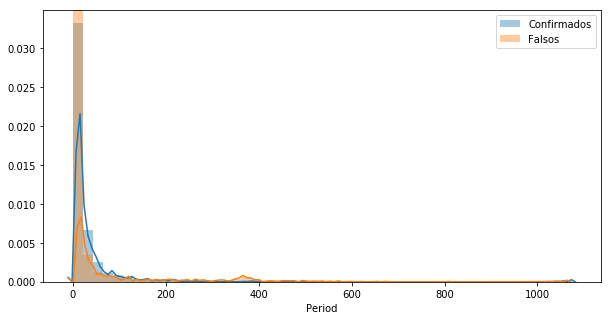

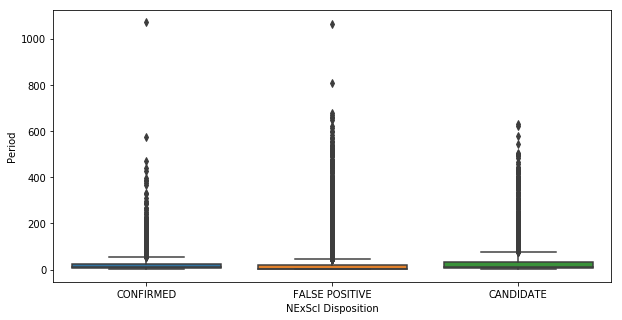

First Transit Time (BJD)


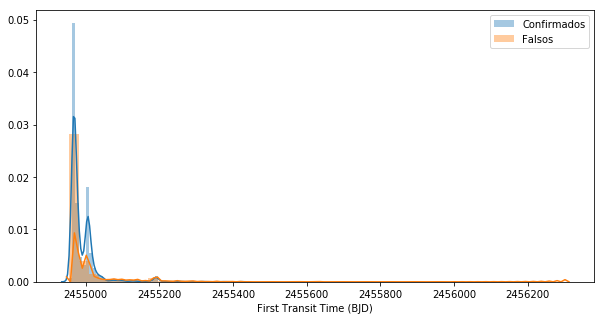

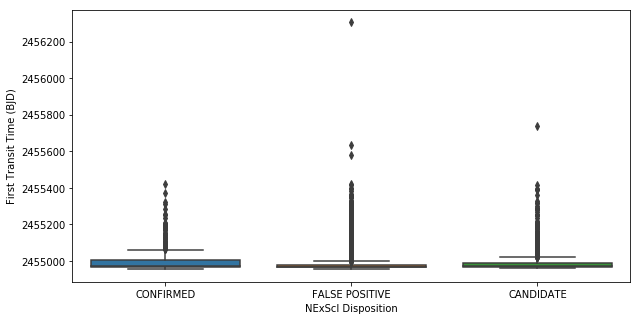

Duration


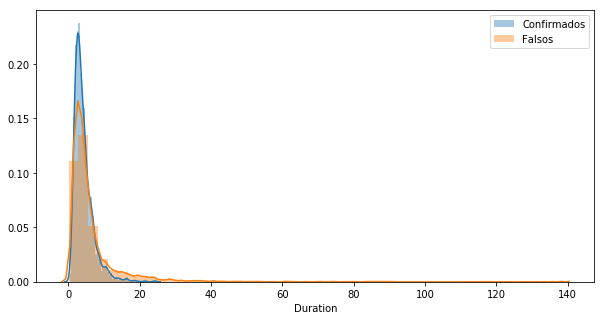

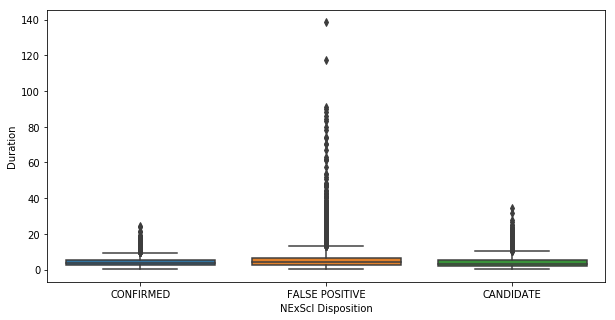

Transit Depth


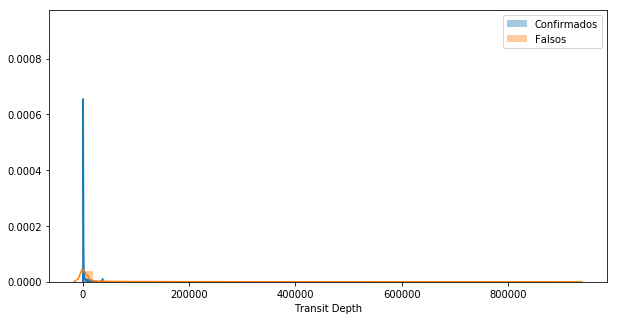

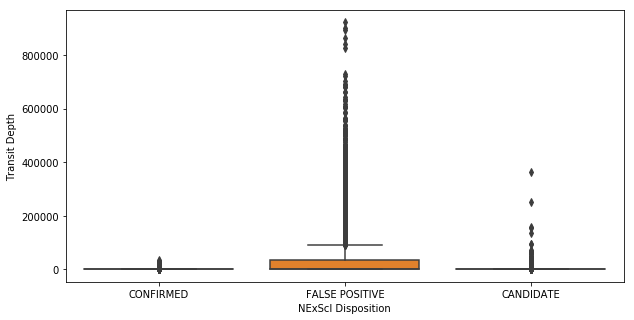

Semi-major Axis


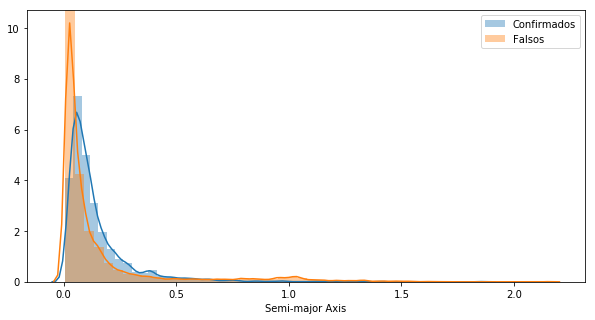

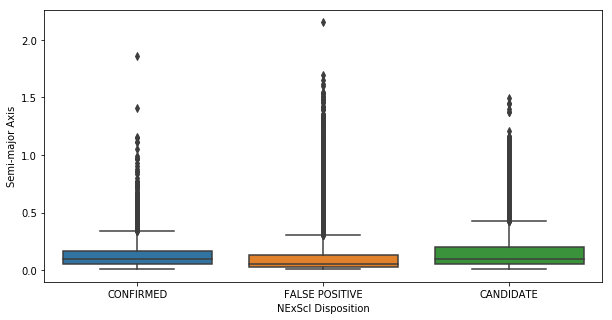

Planet Radius


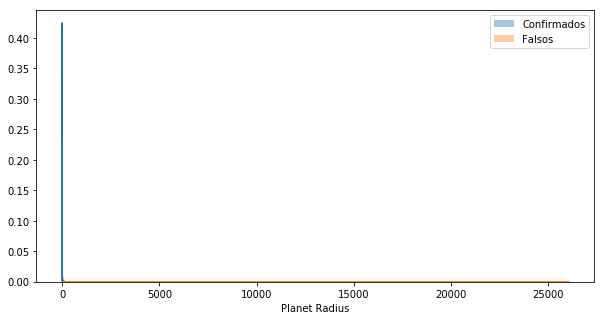

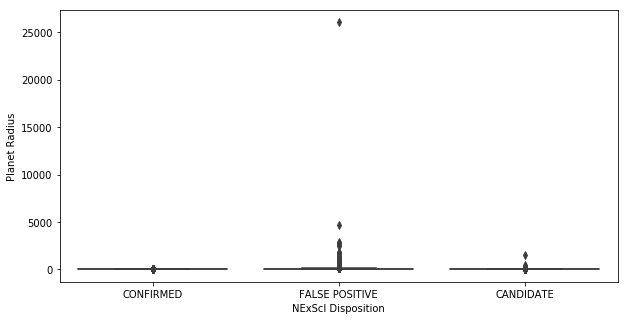

Teq


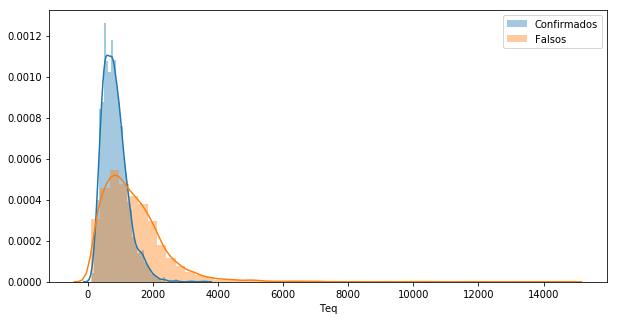

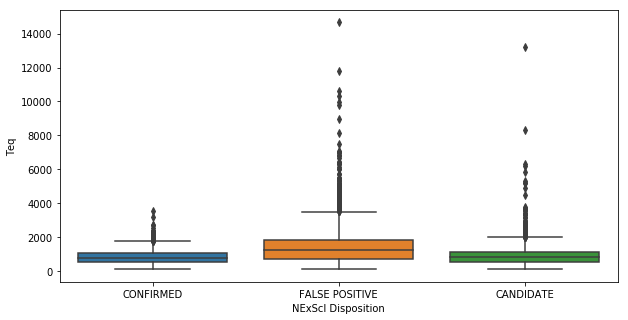

Transit Number


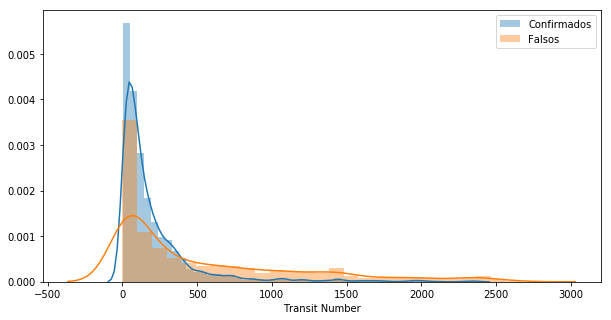

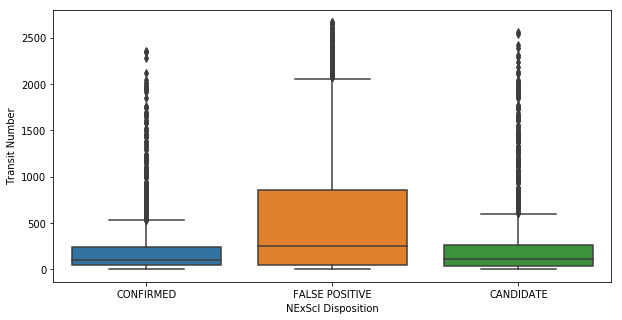

In [48]:
for metadata in df_meta_obj.columns[1:]:
    print(metadata)
    plt.figure(figsize=(10,5))
    sns.distplot(df_meta_obj[metadata][mask_conf], label="Confirmados")
    sns.distplot(df_meta_obj[metadata][mask_fp], label="Falsos")
    #sns.distplot(df_meta["Period"][mask_cand], label="Candidatos")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,5))
    sns.boxplot(x="NExScI Disposition", y=metadata, data=df_meta_obj)
    plt.show()

In [8]:
print("Detalles de Periodo")
aux = df_meta_obj["Period"][mask_conf].values
print("*** En dias (BJD)")
print("Mean =",aux.mean())
print("Min  =",aux.min())
print("Max  =",aux.max())
print("Std  =",aux.std())

pt_day = 0.020433587455414834
print("*** En puntos de Kepler")
print("Mean =",aux.mean()/pt_day)
print("Min  =",aux.min()/pt_day)
print("Max  =",aux.max()/pt_day)
print("Std  =",aux.std()/pt_day)

print("*** En horas (BJD)")
print("Mean =",aux.mean()*24)
print("Min  =",aux.min()*24)
print("Max  =",aux.max()*24)
print("Std  =",aux.std()*24)

Detalles de Periodo
*** En dias (BJD)
Mean = 26.570222605513372
Min  = 0.34184201700000005
Max  = 1071.232624
Std  = 51.25105536778099
*** En puntos de Kepler
Mean = 1300.3209868794895
Min  = 16.729417570257006
Max  = 52425.08817100185
Std  = 2508.177062868108
*** En horas (BJD)
Mean = 637.6853425323209
Min  = 8.204208408000001
Max  = 25709.582975999998
Std  = 1230.0253288267438


In [6]:
print("Detalles de Radio")
aux = df_meta_obj["Planet Radius"][mask_conf].values
print("*** En earth radius (1= Earth radius)")
print("Mean =",aux.mean())
print("Min  =",aux.min())
print("Max  =",aux.max())
print("Std  =",aux.std())

Detalles de Radio
*** En earth radius (1= Earth radius)
Mean = 2.8717536168347215
Min  = 0.49
Max  = 77.76
Std  = 3.365600681350924


In [ ]:
## normalize and plot correlations

In [60]:
from sklearn.preprocessing import StandardScaler, RobustScaler
model = RobustScaler()
#model = StandardScaler()
X = model.fit_transform(df_meta_obj.iloc[:,1:].values)
X

array([[  0.06433987,   1.30735524,  -0.46741156, ...,   0.44878593,
         -0.20588235,   0.02285027],
       [ -0.11415883,   8.50032121,  -0.02020771, ...,  -0.07256489,
         -0.11519608,   0.19603127],
       [ 12.59298135,   6.87846739,  -0.10154513, ...,  -0.03404968,
         -0.77818627,  -0.33553818],
       ..., 
       [ -0.25700483,  -0.09941223,  -0.32698207, ...,  -0.06698298,
          0.12132353,   1.22549609],
       [  4.16016058,   3.49078078,   0.09828037, ...,  -0.01674574,
         -0.79656863,  -0.31629585],
       [ -0.30210461,  -0.16887039,  -0.55326335, ...,  -0.06140106,
          0.58333333,   2.57726999]])

In [ ]:
#outliers replace with median...

In [54]:
X_df = pd.DataFrame(X,columns=metadata_used[1:])
X_df["NExScI Disposition"] = df_meta_obj["NExScI Disposition"]

Period


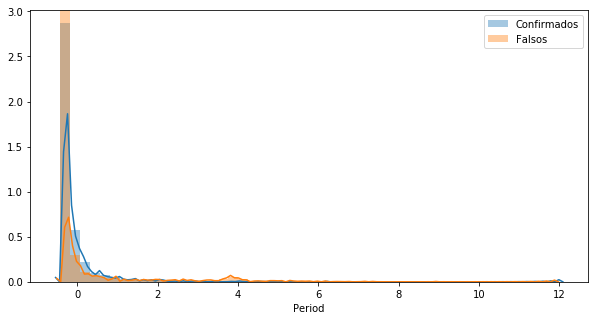

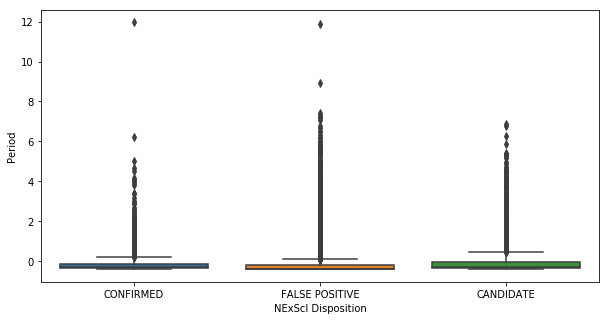

First Transit Time (BJD)


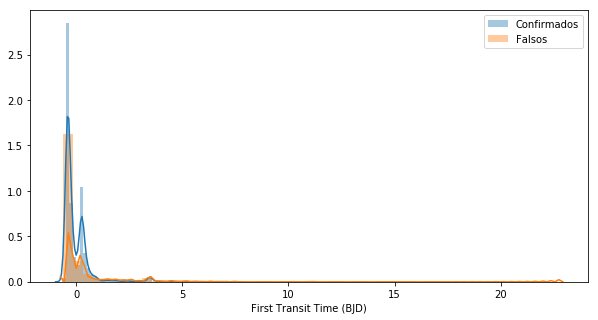

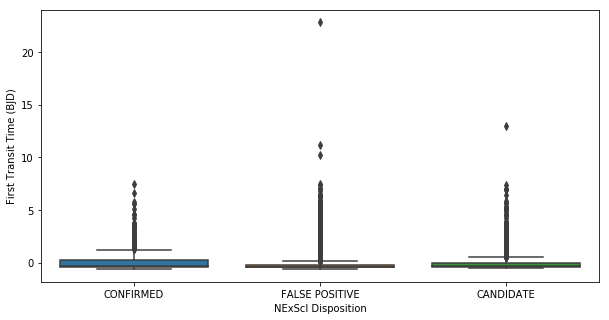

Duration


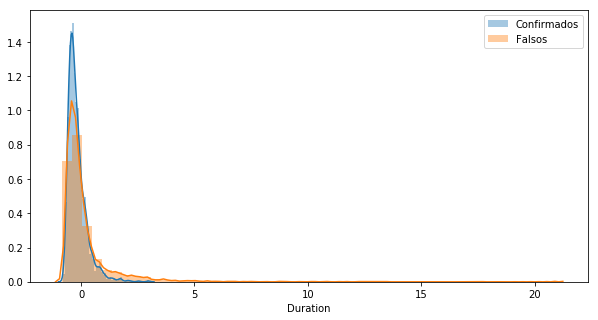

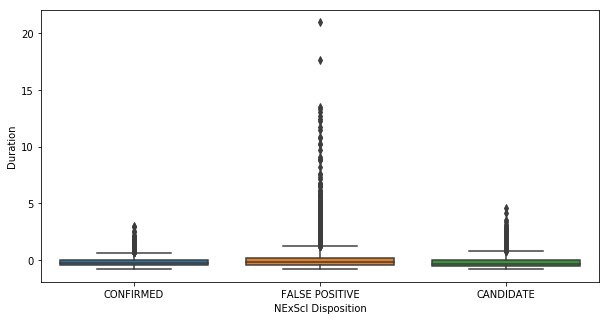

Transit Depth


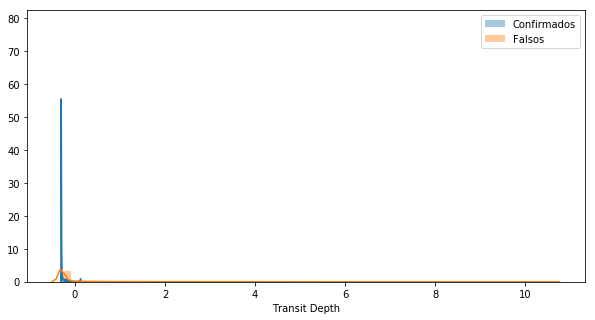

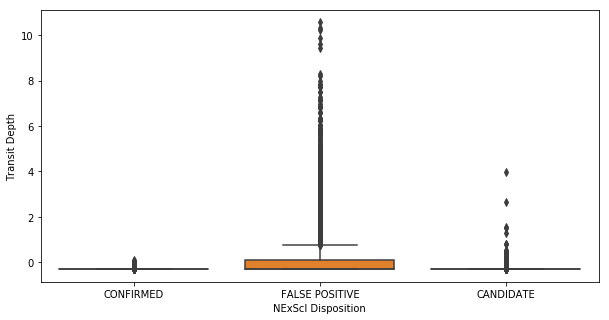

Semi-major Axis


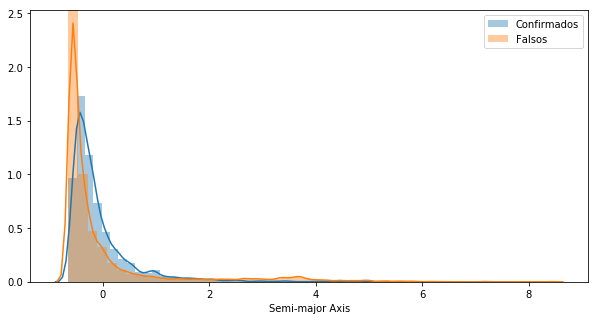

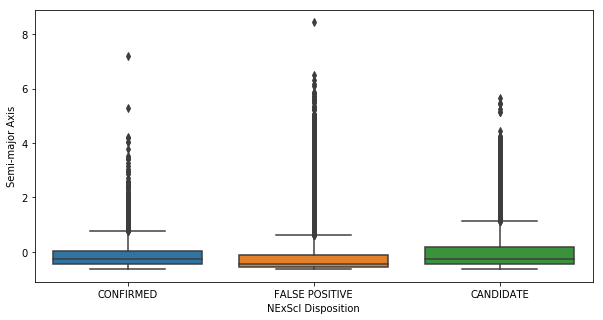

Planet Radius


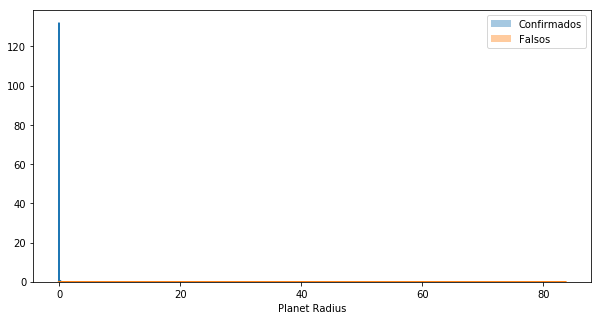

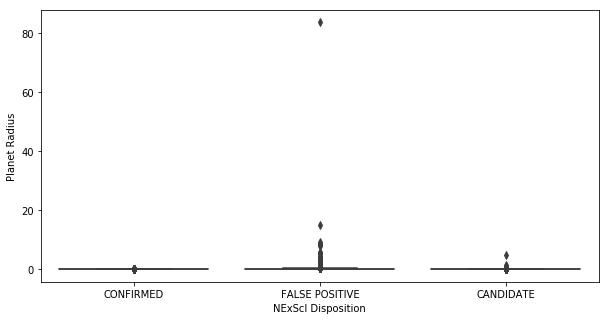

Teq


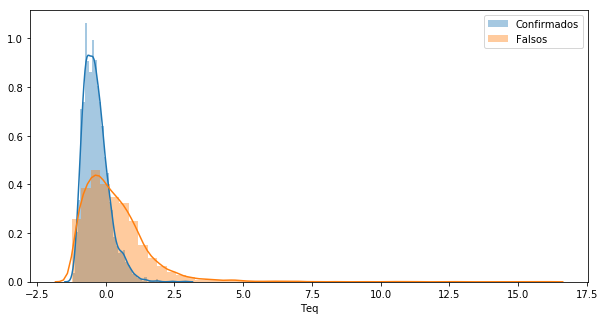

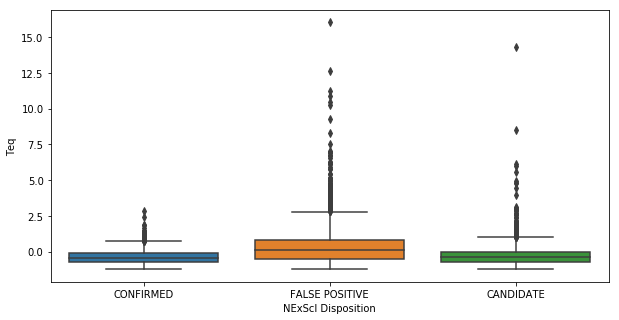

Transit Number


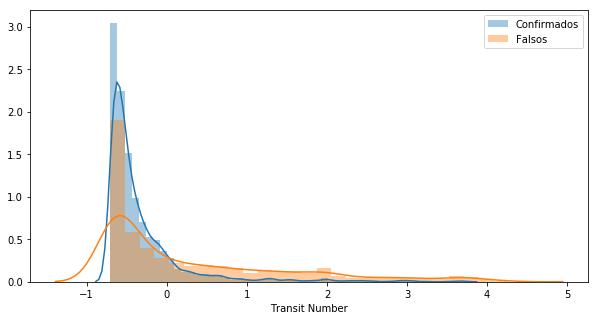

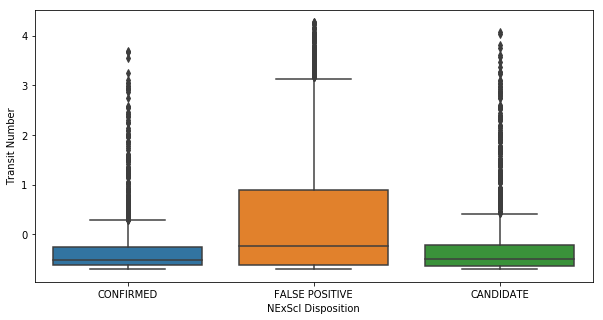

In [55]:
for metadata in df_meta_obj.columns[1:]:
    print(metadata)
    plt.figure(figsize=(10,5))
    sns.distplot(X_df[metadata][mask_conf], label="Confirmados")
    sns.distplot(X_df[metadata][mask_fp], label="Falsos")
    #sns.distplot(df_meta["Period"][mask_cand], label="Candidatos")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,5))
    sns.boxplot(x="NExScI Disposition", y=metadata, data=X_df)
    plt.show()

In [4]:
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy") #no contiene nans
lc_kepler = np.load(folder_lc+"npy/KOI_LC_detrend.npy" ) #contiene nans!
lc_kepler.shape

(8054, 71427)

In [5]:
time_coupled =[]
lc_coupled = []
for i in range(lc_kepler.shape[0]):
    mask_nan = np.isnan(lc_kepler[i])
    time_coupled.append(time_kepler[i][~mask_nan])
    lc_coupled.append(lc_kepler[i][~mask_nan])

In [6]:
pt_day = 0.020433587455414834
df_meta_obj[["NExScI Disposition","Period"]] #se demora mas un falso positivo?

,NExScI Disposition,Period
0,CONFIRMED,8.884923
1,FALSE POSITIVE,5.092465
2,FALSE POSITIVE,275.073650
3,FALSE POSITIVE,8.460439
4,CANDIDATE,21.761298
5,CANDIDATE,4.287467
6,FALSE POSITIVE,0.539366
7,FALSE POSITIVE,36.267167
8,CANDIDATE,4.298920
9,FALSE POSITIVE,161.788327


In [65]:
from astropy.timeseries import BoxLeastSquares, LombScargle
from gatspy.periodic import LombScargle as LombScargleGAT
from scipy.signal import lombscargle

i = 0

In [11]:
model = LombScargleFast().fit(time_coupled[i], lc_coupled[i])

period, power = model.periodogram_auto(nyquist_factor=200)

print("period range: ({0}, {1})".format(period.min(), period.max()))
print("number of periods: {0}".format(len(period)))

period range: (0.0002265513013722021, 7297.443968500002)
number of periods: 32211000


In [118]:
# Choose a period grid
precision_needed = 1e-1 #ya es suficientemente pequeño 1e-3
periods = np.arange(0.01, 3000, precision_needed )

ang_freqs = 2 * np.pi / periods
freqs = 1 / periods

print("Cantidad de valores a explorar: ",ang_freqs.shape[0])
periods

Cantidad de valores a explorar:  30000


array([1.00000e-02, 1.10000e-01, 2.10000e-01, ..., 2.99971e+03,
       2.99981e+03, 2.99991e+03])

In [119]:
%%time
periodogram = lombscargle(time_coupled[i], lc_coupled[i], ang_freqs, normalize=False)#input has to be centered..
periodogram

CPU times: user 2min 19s, sys: 580 ms, total: 2min 20s
Wall time: 2min 19s


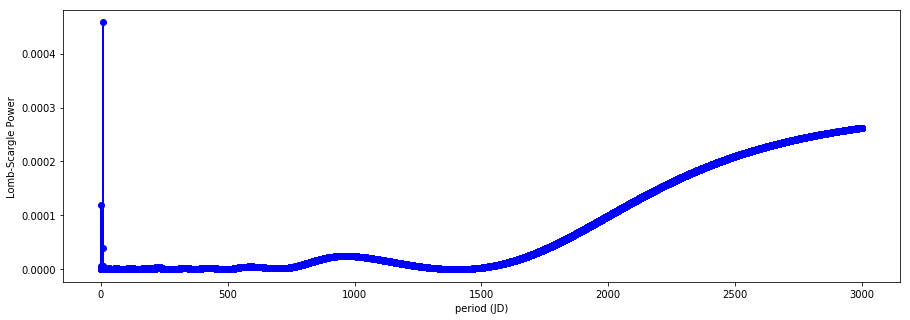

Max power Period:  8.91
Second Max power Period:  2999.9100000000003


In [120]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [11]:
%%time
model = LombScargleGAT(fit_offset=True, center_data=False).fit(time_coupled[i], lc_coupled[i])
periodogram = model.score(periods)

CPU times: user 1min 38s, sys: 1.54 s, total: 1min 40s
Wall time: 1min 38s


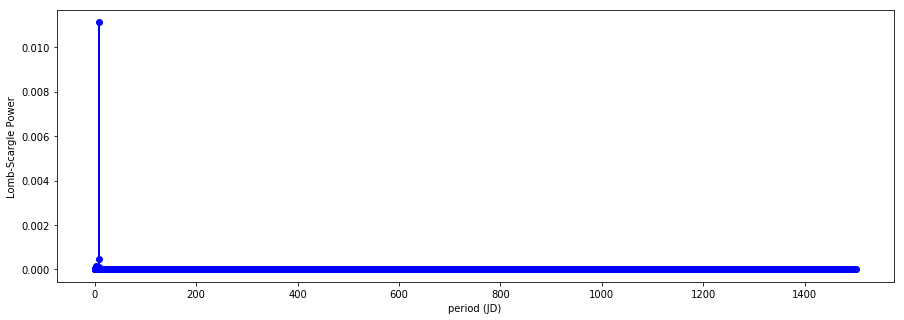

Max power Period:  8.9
Second Max power Period:  8.8


In [12]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [121]:
%%time
model = LombScargle(time_coupled[i], lc_coupled[i], center_data=False) #revisar extras..
periodogram = model.power(freqs,method='chi2')

CPU times: user 3min 4s, sys: 1.44 s, total: 3min 6s
Wall time: 3min 4s


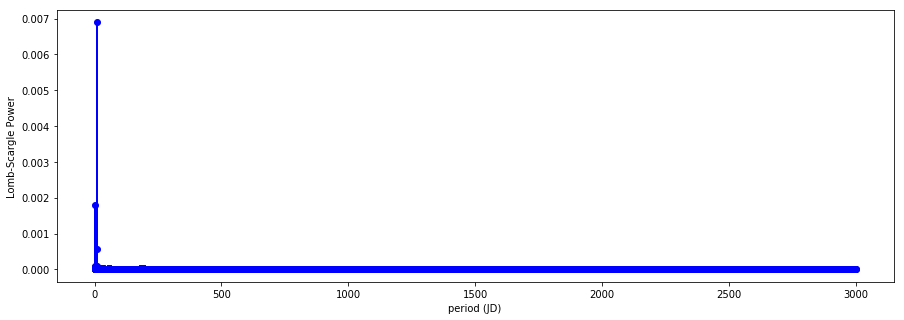

Max power Period:  8.91
Second Max power Period:  1.11


In [122]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [129]:
precision_needed = 1e-3 #ya es suficientemente pequeño 1e-3

freqs = np.arange(0.0005, 100, precision_needed )
periods = 2*np.pi/ freqs

print("Cantidad de valores a explorar: ",freqs.shape[0])
periods

Cantidad de valores a explorar:  100000


array([1.25663706e+04, 4.18879020e+03, 2.51327412e+03, ...,
       6.28334239e-02, 6.28327956e-02, 6.28321672e-02])

In [127]:
%%time
model = LombScargle(time_coupled[i], lc_coupled[i], center_data=False) #revisar extras..
periodogram = model.power(freqs, method='fast')

CPU times: user 723 ms, sys: 1.24 s, total: 1.97 s
Wall time: 333 ms


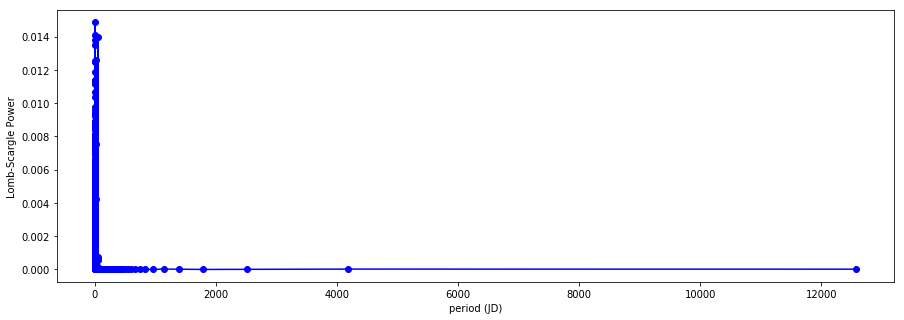

Max power Period:  5.582572463064937
Second Max power Period:  2.9381273355995257


In [130]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [ ]:
normalization : {‘standard’, ‘model’, ‘log’, ‘psd’}, optional

### Box Least-Squares
data has to be continous

In [22]:
#complete with linear splines numpy..
ts = lc_kepler[i]
ts

array([-0.0001794, -0.0008039, -0.0001709, ...,  0.0003001, -0.0039776,
        0.0002544])

In [43]:
%%time
model = BoxLeastSquares(time_coupled[i], lc_coupled[i])
results = model.power(periods, duration=np.arange(0.01,10,100)) #que es duration????--duracion de transito

transit_time = results.transit_time
depth = results.depth
duration = results.duration
periodogram = results.power

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 34.1 µs


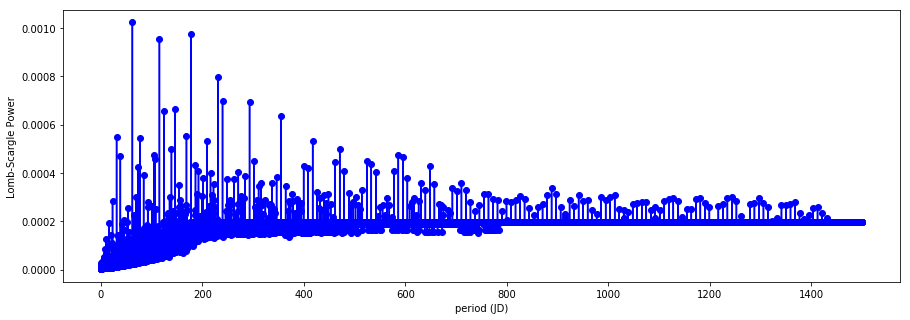

Max power Period:  62.2
Second Max power Period:  177.70000000000002


In [46]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

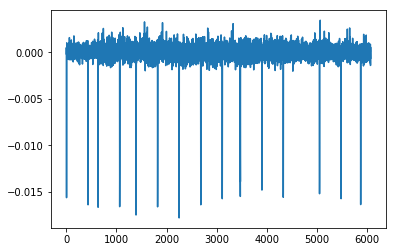

In [132]:

init= 1000
finit = 1000+ int( 62/pt_day)*2
plt.plot(lc_coupled[0][init:finit])